In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from PIL import Image

In [59]:
df = pd.read_csv("Train.csv")
dftest = pd.read_csv("Test.csv")
cv = pd.read_csv("Meta.csv")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [61]:
df.isnull().sum()

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

In [62]:
df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [63]:
df.shape

(39209, 8)

In [64]:
dftest.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [65]:
cv.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [66]:
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [67]:
# So we can see that there are 30 distinct classes 
# So we have to make our model and classify our test set into theese 30 different road signs 
df['ClassId'].value_counts().unique().shape

(30,)

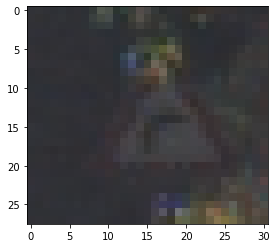

In [68]:
img = Image.open('Train/20/00020_00000_00006.png')
plt.imshow(img)

In [69]:
l = len(df['ClassId'])

In [70]:
df['ClassId'] = df['ClassId'].astype(str)
dftest['ClassId'] = dftest['ClassId'].astype(str)
for i in range(0, len(df['ClassId'])):
    if len(df['ClassId'][i]) == 1:
        df['ClassId'][i] = '0' + df['ClassId'][i]
for i in range(0, len(dftest['ClassId'])):
    if len(dftest['ClassId'][i]) == 1:
        dftest['ClassId'][i] = '0' + df['ClassId'][i]


<ipython-input-70-1bad6187d52a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ClassId'][i] = '0' + df['ClassId'][i]
<ipython-input-70-1bad6187d52a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['ClassId'][i] = '0' + df['ClassId'][i]


In [71]:
print(df['ClassId'][10], df['Path'][10])

20 Train/20/00020_00000_00010.png


In [72]:
import keras 
from matplotlib import pyplot as plt
from keras.applications import Xception

In [73]:
gen_train = keras.preprocessing.image.ImageDataGenerator(rescale=1./128,shear_range=0.2)
gen_test = keras.preprocessing.image.ImageDataGenerator(rescale=1./128)
generator_train = gen_train.flow_from_dataframe(dataframe=df,
                                                #directory='Traffic_Ligth_dataset',
                                                target_size=(128, 128),
                                                x_col='Path',
                                                y_col='ClassId',
                                                batch_size=32,
                                                class_mode='categorical'
                                                )

Found 39209 validated image filenames belonging to 43 classes.


In [74]:
generator_test = gen_test.flow_from_dataframe(dataframe=dftest,
                                            #directory='../input/gtsrb-german-traffic-sign/',
                                            x_col='Path',
                                            y_col='ClassId',
                                            target_size=(128, 128),
                                            batch_size=16,
                                            class_mode='categorical'
                                            )

Found 12630 validated image filenames belonging to 43 classes.


In [75]:
print("_"*100)

____________________________________________________________________________________________________


In [43]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping 
%matplotlib inline

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, pooling, AveragePooling2D, MaxPooling2D, Dropout
#create model
model = Sequential()
#add model layers
model.add(Conv2D(20, kernel_size=3, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(10, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25)) 
model.add(Conv2D(5, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(5, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(43, activation='softmax'))
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 126, 126, 20)      560       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 63, 63, 20)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 63, 63, 20)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 61, 61, 10)        1810      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 30, 30, 10)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 30, 10)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 28, 28, 5)       

In [45]:
history = model.fit(generator_train,epochs=10,batch_size=64,verbose=1,callbacks=[early_stop])

Epoch 1/10
1226/1226 [==============================] - 1040s 847ms/step - loss: 3.1038 - accuracy: 0.1665
Epoch 2/10
1226/1226 [==============================] - 1053s 859ms/step - loss: 1.3312 - accuracy: 0.5784
Epoch 3/10
1226/1226 [==============================] - 1040s 848ms/step - loss: 0.8470 - accuracy: 0.7307
Epoch 4/10
1226/1226 [==============================] - 721s 588ms/step - loss: 0.6693 - accuracy: 0.7881
Epoch 5/10
1226/1226 [==============================] - 662s 540ms/step - loss: 0.5953 - accuracy: 0.8068
Epoch 6/10
1226/1226 [==============================] - 708s 578ms/step - loss: 0.5475 - accuracy: 0.8251
Epoch 7/10
1226/1226 [==============================] - 689s 562ms/step - loss: 0.5169 - accuracy: 0.8354
Epoch 8/10
1226/1226 [==============================] - 1034s 843ms/step - loss: 0.5001 - accuracy: 0.8404
Epoch 9/10
1226/1226 [==============================] - 754s 614ms/step - loss: 0.4771 - accuracy: 0.8460
Epoch 10/10
1226/1226 [===================

<AxesSubplot:>

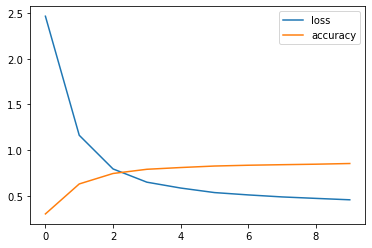

In [46]:
losses = pd.DataFrame(model.history.history)
losses
losses.plot()


In [50]:
model.evaluate(generator_test)

790/790 [==============================] - 58s 74ms/step - loss: 3.3626 - accuracy: 0.6099


[3.362647533416748, 0.6098970770835876]

In [77]:
print("_"*100)

____________________________________________________________________________________________________
